<a href="https://colab.research.google.com/github/SowruvMinhajTaher/First-Repository/blob/main/Classification%20NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Introduction to neural network classification with Tensorflow

In [2]:
# creating data to view and fit
from sklearn.datasets import make_circles
#make 1000 examples
n_samples = 1000
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
# our data is a little hard to understand right now...Lets visualize it
import pandas as pd
circles = pd.DataFrame({'X0':X[:,0], "X1":X[:,1],"Label":y})
circles

,X0,X1,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


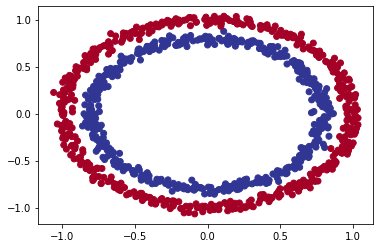

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

#input and output shapes

In [7]:
X.shape,y.shape

((1000, 2), (1000,))

In [8]:
len(X),len(y)

(1000, 1000)

In [9]:
X[4],y[4]

(array([ 0.44220765, -0.89672343]), 0)

## Steps in modelling

In [10]:
import tensorflow as tf
tf.random.set_seed(42)
# create the model using sequential API
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 831us/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 811us/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 907us/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 780us/step - loss: 0.6942 - accuracy: 0.4830


In [11]:
# Lets try and improve our model
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)
# here we fit and evaluate on the same data ,ideally shouldn't do 

32/32 [==============================] - 0s 687us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [12]:
tf.random.set_seed(42)
model_2= tf.keras.Sequential([
                              tf.keras.layers.Dense(1),
                              tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])
model_2.fit(X,y,epochs=100,verbose=0)


In [13]:
# Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 730us/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

In [14]:
# improving our model
tf.random.set_seed(42)
model_3= tf.keras.Sequential([
                              tf.keras.layers.Dense(100),
                              tf.keras.layers.Dense(10),
                              tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
model_3.fit(X,y,epochs=100,verbose=0)

In [15]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 823us/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254054069519, 0.5080000162124634]

To visualize our model's prediction lets create a function 'plot_decision_boundary()` this fuction will:
* Take in a trained model, features (X) and labels(y)
* create a meshgrid of the different X values
* make predictions across the meshgrid
* plot the predictions as well as a line between zones(where each unique class falls)

In [16]:
import numpy as np
def plot_decision_boundary(model,X,y):
    '''plots the decision boundary created by a model prediction on X
    '''
    # Define the axis boundaries of the plot and create a meshgrid
    x_min,x_max = X[:,0].min() - 0.1,X[:,0].max()+0.1
    y_min,y_max = X[:,1].min() - 0.1,X[:,1].max()+0.1
    xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                        np.linspace(y_min,y_max,100))
    # create X values(we are going to make predictions on this)
    x_in = np.c_[xx.ravel(),yy.ravel()] #stack 2D arrays together
    # Make predictions
    y_pred = model.predict(x_in)
    # check for multiclass
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # we have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
    else: 
        print('doing binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    # plot the decision boundary
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
    plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())

doing binary classification


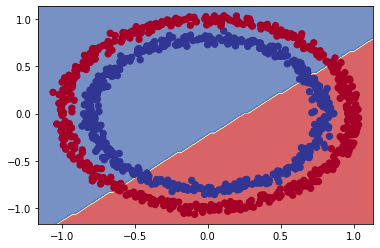

In [17]:
# checkout the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [18]:
x_min,x_max = X[:,0].min() - 0.1,X[:,0].max()+0.1
y_min,y_max = X[:,1].min() - 0.1,X[:,1].max()+0.1
x_min,x_max,y_min,y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

## The missing piece NON-LInearity

In [19]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1,activation='linear')
])
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])
history = model_4.fit(X,y,epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
32/32 [==============================] - 0s 860us/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 820us/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 731us/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 727us/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 852us/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 789us/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 744us/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 764us/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 910us/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 867us/step - loss: 3.7547 - accura

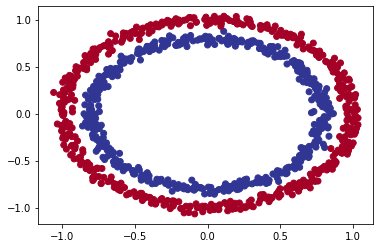

In [20]:
# checking out our data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

doing binary classification


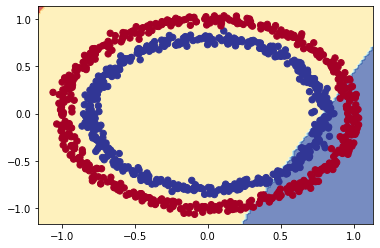

In [21]:
# check the decision boundary on our latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

In [22]:
tf.random.set_seed(42)
model_5= tf.keras.Sequential([
                               tf.keras.layers.Dense(1,activation='relu')
])
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])
history = model_5.fit(X,y,epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
32/32 [==============================] - 0s 801us/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 882us/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 839us/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 841us/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 899us/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 828us/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 933us/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 840us/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 795us/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 816us/step - loss: 3.7547 - accura

In [23]:
tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(1,activation='sigmoid')
])
model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])
history = model_6.fit(X,y,epochs=200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


32/32 [==============================] - 0s 956us/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/200
32/32 [==============================] - 0s 903us/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/200
32/32 [==============================] - 0s 922us/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/200
32/32 [==============================] - 0s 914us/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/200
32/32 [==============================] - 0s 995us/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/200
32/32 [==============================] - 0s 944us/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/200
32/32 [==============================] - 0s 952us/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/200
32/32 [==============================] - 0s 927us/step - loss: 0.6766 - accuracy: 0.5510
Epoch

In [24]:
# evaluate our model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 801us/step - loss: 0.0690 - accuracy: 0.9930


[0.06901050359010696, 0.9929999709129333]

doing binary classification


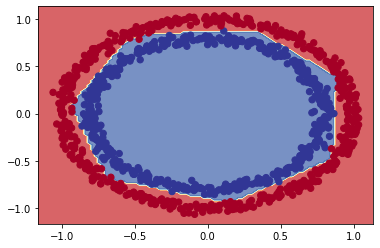

In [25]:
plot_decision_boundary(model_6,X,y)

#Finding the best learning rate
To find the ideal learning rate (the learning rate where the loss decreases the most during training)we are going to use the following steps:
* A learning rate **callback** you can think of a callback as an extra piece of functionality, you can add to your *while* its training .
* Building models
* A modified loss curve plot


In [26]:
X,y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [27]:
# creating test and training set
X_train=X[:800]
y_train=y[:800]
X_test=X[800:]
y_test=y[800:]

In [28]:
len(X_train),len(y_train),len(X_test),len(y_test)

(800, 800, 200, 200)

In [29]:
tf.random.set_seed(42)
model_9 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4,activation='relu'),
                               tf.keras.layers.Dense(4,activation='relu'),
                               tf.keras.layers.Dense(1,activation='sigmoid')
])
model_9.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])
#create a learning rate callbacks as callback works during training so we should implement it before training
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 953us/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 828us/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 827us/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 844us/step - loss: 0.6914 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 871us/step - loss: 0.6906 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 962us/step - loss: 0.6898 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 937us/step - loss: 0.6889 - accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 918us/step - loss: 0.6871 - accuracy: 

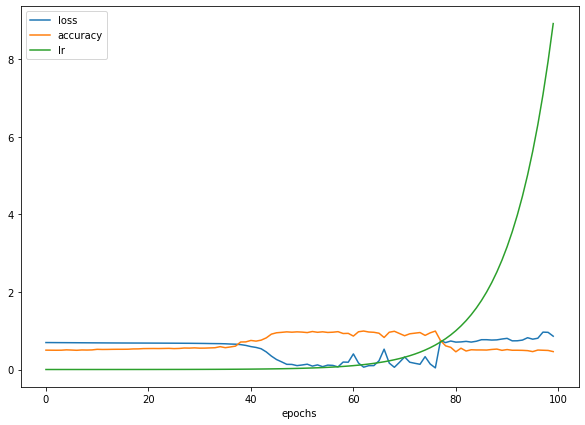

In [30]:
# checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel='epochs')


Text(0.5, 1.0, 'Learning rate vs Loss')

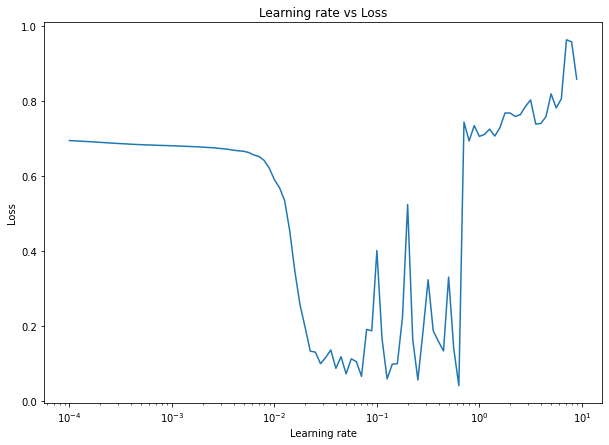

In [31]:
# lets plot the learning rate versus loss
lrs=1e-4*(10**  (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [32]:
# Example of other typical learning rate values:
10**0 ,10**-1,10**-2,1e-4

(1, 0.1, 0.01, 0.0001)

In [33]:
#lets try using a higher *ideal* learning rate with the same model
tf.random.set_seed(42)
model_10 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4,activation='relu'),
                               tf.keras.layers.Dense(4,activation='relu'),
                               tf.keras.layers.Dense(1,activation='sigmoid')
])
model_10.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics=['accuracy'])

# Fit the model with less epochs than before
history_10 = model_10.fit(X_train,
                        y_train,
                        epochs=20)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
25/25 [==============================] - 0s 917us/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 818us/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 817us/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 797us/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 875us/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 873us/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 932us/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 940us/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 887us/step - loss: 0.2512 - accuracy: 0.9500
E

In [34]:
# evaluate model 10 on the test dataset
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740182101726532, 0.9900000095367432]

doing binary classification
doing binary classification


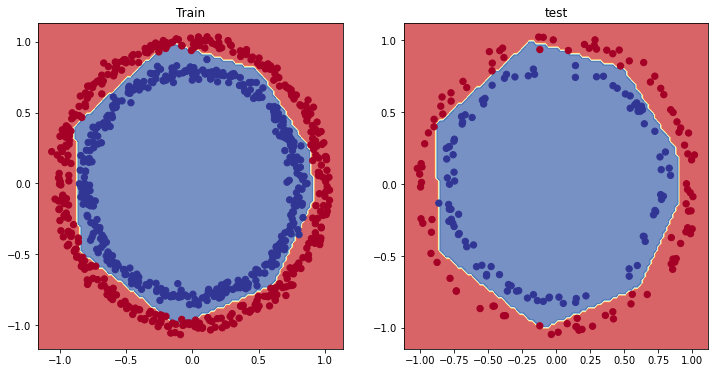

In [35]:
# plot the decision boundaryies for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

In [36]:
# check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test,y_test)
print(f"Model loss on the test set:{loss}")
print(f"Model accuracy on the test set:{accuracy*100:.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set:0.05740182101726532
Model accuracy on the test set:99.00%


In [37]:
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740182101726532, 0.9900000095367432]

# confusion matrix

In [38]:
from sklearn.metrics import confusion_matrix
# make predictions
y_preds=model_10.predict(X_test)
# create confusion matrix
confusion_matrix(y_test,y_preds)

ValueError: ignored

In [ ]:
y_test[:10]

In [ ]:
y_preds[:10]

oops looks like our predictions array has come out in prediction_probability form.the standard output from the sigmoid(or softmax)activation functions

In [ ]:
#convert prediction probability into binary formats
tf.round(y_preds)[:10]

In [ ]:
# create confusion matrix
confusion_matrix(y_test,tf.round(y_preds))

how about we prettify our confusion matrix

In [ ]:
# the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix
import itertools
figsize=(10,10)
# create the confusion matrix
cm = confusion_matrix(y_test,tf.round(y_preds))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis] # Normalize our confusion matrix
n_classes = cm.shape[0]

#lets prettify it
fig,ax = plt.subplots(figsize=figsize)
# create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)
# create classes
classes = False
if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])
# Label the axes 
ax.set(title ='confusion Matrix',
       xlabel='Predicted label',
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set the threshold for different colors
threshold = (cm.max() + cm.min()) / 2
#plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i, j]*100:.1f}%)",
    horizontalalignment='center',
    color='white' if cm[i, j]> threshold else 'black',
    size=15)
    

In [ ]:
cm_norm

In [ ]:
cm

In [ ]:
cm.sum(axis=1)[:,np.newaxis]

In [ ]:
cm.sum(axis=1)

In [ ]:
cm.sum(axis=0)

In [ ]:
cm.sum(axis=1)[np.newaxis,:]